In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import os

dataset_path = os.listdir('/content/drive/MyDrive/Videos/Videos')

label_types = os.listdir('/content/drive/MyDrive/Videos/Videos')
print (label_types[1][-6]+label_types[1][-5])  
label_types[0]

PL


'BF003_3NT.wmv'

# Adding labels of videos and saved video names 






In [3]:
rooms = []

 # Add them to the list
for room in dataset_path:
    rooms.append((room, str('/content/drive/MyDrive/Videos/Videos' + '/' +room) ))
    
# Build a dataframe        
train_df = pd.DataFrame(data=rooms, columns=['tag', 'video_name'])
print(train_df.head())
print(train_df.tail())

             tag                                         video_name
0  BF003_3NT.wmv  /content/drive/MyDrive/Videos/Videos/BF003_3NT...
1  BF001_4PL.wmv  /content/drive/MyDrive/Videos/Videos/BF001_4PL...
2  BF001_1PT.wmv  /content/drive/MyDrive/Videos/Videos/BF001_1PT...
3  BF003_4PL.wmv  /content/drive/MyDrive/Videos/Videos/BF003_4PL...
4  BF002_3NT.wmv  /content/drive/MyDrive/Videos/Videos/BF002_3NT...
               tag                                         video_name
315   WM13_3NT.wmv  /content/drive/MyDrive/Videos/Videos/WM13_3NT.wmv
316   WM19_3NT.wmv  /content/drive/MyDrive/Videos/Videos/WM19_3NT.wmv
317   WM19_4PL.wmv  /content/drive/MyDrive/Videos/Videos/WM19_4PL.wmv
318  WM027_3NT.wmv  /content/drive/MyDrive/Videos/Videos/WM027_3NT...
319  WM027_4PL.wmv  /content/drive/MyDrive/Videos/Videos/WM027_4PL...


In [4]:
train_df.video_name.to_list()

['/content/drive/MyDrive/Videos/Videos/BF003_3NT.wmv',
 '/content/drive/MyDrive/Videos/Videos/BF001_4PL.wmv',
 '/content/drive/MyDrive/Videos/Videos/BF001_1PT.wmv',
 '/content/drive/MyDrive/Videos/Videos/BF003_4PL.wmv',
 '/content/drive/MyDrive/Videos/Videos/BF002_3NT.wmv',
 '/content/drive/MyDrive/Videos/Videos/BF003_1PT.wmv',
 '/content/drive/MyDrive/Videos/Videos/BF004_1PT.wmv',
 '/content/drive/MyDrive/Videos/Videos/BF003_2NL.wmv',
 '/content/drive/MyDrive/Videos/Videos/BF001_3NT.wmv',
 '/content/drive/MyDrive/Videos/Videos/BF002_1PT.wmv',
 '/content/drive/MyDrive/Videos/Videos/BF002_4PL.wmv',
 '/content/drive/MyDrive/Videos/Videos/BF001_2NL.wmv',
 '/content/drive/MyDrive/Videos/Videos/BF002_2NL.wmv',
 '/content/drive/MyDrive/Videos/Videos/BF015_2NL.wmv',
 '/content/drive/MyDrive/Videos/Videos/BF006_1PT.wmv',
 '/content/drive/MyDrive/Videos/Videos/BF014_3NT.wmv',
 '/content/drive/MyDrive/Videos/Videos/BF006_3NT.wmv',
 '/content/drive/MyDrive/Videos/Videos/BF013_3NT.wmv',
 '/content

# save it to CSV file named Train

In [5]:
df = train_df.loc[:,['video_name','tag']]
df
df.to_csv('train.csv')

# install-import the tensorflow docs, tagging of videoids are done

In [6]:
!pip install git+https://github.com/tensorflow/docs

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/tensorflow/docs to /tmp/pip-req-build-62jbp63w
  Running command git clone --filter=blob:none --quiet https://github.com/tensorflow/docs /tmp/pip-req-build-62jbp63w
  Resolved https://github.com/tensorflow/docs to commit abfbe6e54864baa38dbb985b984acd304be610d4
  Preparing metadata (setup.py) ... done
  Created wheel for tensorflow-docs: filename=tensorflow_docs-0.0.0.dev0-py3-none-any.whl size=183273 sha256=3ad6d096140fa0ad41ae3f4c8dd539a9ebbe16ab6c8acf3e463b5e792b560bff
  Stored in directory: /tmp/pip-ephem-wheel-cache-7qsao78y/wheels/86/0f/1e/3b62293c8ffd0fd5a49508e6871cdb7554abe9c62afd35ec53
Successfully built tensorflow-docs


In [7]:
  from tensorflow_docs.vis import embed
  from tensorflow import keras
  from imutils import paths

  import matplotlib.pyplot as plt
  import tensorflow as tf
  import pandas as pd
  import numpy as np
  import imageio
  import cv2
  import os

In [ ]:
df['VideoID']=1
df

,video_name,tag,VideoID
0,/content/drive/MyDrive/Videos/Videos/BF001_1PT...,BF001_1PT.wmv,1
1,/content/drive/MyDrive/Videos/Videos/BF028_4PL...,BF028_4PL.wmv,1
2,/content/drive/MyDrive/Videos/Videos/BF033_1PT...,BF033_1PT.wmv,1
3,/content/drive/MyDrive/Videos/Videos/BF033_2NL...,BF033_2NL.wmv,1
4,/content/drive/MyDrive/Videos/Videos/BF033_3NT...,BF033_3NT.wmv,1
...,...,...,...
316,/content/drive/MyDrive/Videos/Videos/WM19_3NT.wmv,WM19_3NT.wmv,1
317,/content/drive/MyDrive/Videos/Videos/WM19_4PL.wmv,WM19_4PL.wmv,1
318,/content/drive/MyDrive/Videos/Videos/WM13_3NT.wmv,WM13_3NT.wmv,1
319,/content/drive/MyDrive/Videos/Videos/WM027_4PL...,WM027_4PL.wmv,1


In [10]:
for i in range(df.shape[0]):

  df['VideoID'][i]=train_df['tag'][i][:-4]
df

KeyError: ignored

In [ ]:
train_df.shape

(321, 2)

# Adding Deception Labels

In [8]:
train_df = pd.read_csv("/content/train.csv")
train_df['Deception']=np.zeros(train_df.shape[0])
#test_df = pd.read_csv("test.csv")

print(f"Total videos for training: {len(train_df)}")
#print(f"Total videos for testing: {len(test_df)}")

for i in range(0,train_df.shape[0]):
  
  train_df['Deception'].loc[i]=train_df['tag'][i][-5]
train_df

Total videos for training: 320


<ipython-input-8-e0fb7754aadf>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['Deception'].loc[i]=train_df['tag'][i][-5]


,Unnamed: 0,video_name,tag,Deception
0,0,/content/drive/MyDrive/Videos/Videos/BF003_3NT...,BF003_3NT.wmv,T
1,1,/content/drive/MyDrive/Videos/Videos/BF001_4PL...,BF001_4PL.wmv,L
2,2,/content/drive/MyDrive/Videos/Videos/BF001_1PT...,BF001_1PT.wmv,T
3,3,/content/drive/MyDrive/Videos/Videos/BF003_4PL...,BF003_4PL.wmv,L
4,4,/content/drive/MyDrive/Videos/Videos/BF002_3NT...,BF002_3NT.wmv,T
...,...,...,...,...
315,315,/content/drive/MyDrive/Videos/Videos/WM13_3NT.wmv,WM13_3NT.wmv,T
316,316,/content/drive/MyDrive/Videos/Videos/WM19_3NT.wmv,WM19_3NT.wmv,T
317,317,/content/drive/MyDrive/Videos/Videos/WM19_4PL.wmv,WM19_4PL.wmv,L
318,318,/content/drive/MyDrive/Videos/Videos/WM027_3NT...,WM027_3NT.wmv,T


# Video features Extract

In [9]:
# The following two methods are taken from this tutorial:
# https://www.tensorflow.org/hub/tutorials/action_recognition_with_tf_hub
IMG_SIZE = 224


def crop_center_square(frame):
    y, x = frame.shape[0:2]
    min_dim = min(y, x)
    start_x = (x // 2) - (min_dim // 2)
    start_y = (y // 2) - (min_dim // 2)
    return frame[start_y : start_y + min_dim, start_x : start_x + min_dim]


def load_video(path, max_frames=0, resize=(IMG_SIZE, IMG_SIZE)):
    
    cap = cv2.VideoCapture(path)
    print(path)
    frames = []
    try:
        while True:
            ret, frame = cap.read()
            print(ret,frame)
            if not ret:
                break
            frame = crop_center_square(frame)
            frame = cv2.resize(frame, resize)
            frame = frame[:, :, [2, 1, 0]]
            frames.append(frame)

            if len(frames) == max_frames:
                break
    finally:
        cap.release()
    return np.array(frames)

In [10]:
def build_feature_extractor():
    feature_extractor = keras.applications.InceptionV3(
        weights="imagenet",
        include_top=False,
        pooling="avg",
        input_shape=(IMG_SIZE, IMG_SIZE, 3),
    )
    preprocess_input = keras.applications.inception_v3.preprocess_input

    inputs = keras.Input((IMG_SIZE, IMG_SIZE, 3))
    preprocessed = preprocess_input(inputs)

    outputs = feature_extractor(preprocessed)
    return keras.Model(inputs, outputs, name="feature_extractor")


feature_extractor = build_feature_extractor()

87910968/87910968 [==============================] - 1s 0us/step


In [45]:
label_processor = keras.layers.StringLookup(num_oov_indices=0, vocabulary=np.unique(train_df["Deception"]))
print(label_processor.get_vocabulary())

labels = train_df["Deception"].values
labels = label_processor(labels[..., None]).numpy()
(labels)

['L', 'T']


array([[1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
    

In [12]:

IMG_SIZE = 224
BATCH_SIZE = 64
EPOCHS = 100

MAX_SEQ_LENGTH = 20
NUM_FEATURES = 2048


# Extracted Video features in pkl file

In [17]:
import pickle


with open('/content/train_data.pkl', 'rb') as f:
    my_tuple = pickle.load(f)
my_tuple

(array([[[0.6854098 , 0.1606766 , 0.27480108, ..., 0.4572591 ,
          0.44488156, 0.27652252],
         [0.69819283, 0.13448094, 0.33516598, ..., 0.43082437,
          0.2956775 , 0.24422583],
         [0.7556526 , 0.07690734, 0.35465392, ..., 0.41436204,
          0.26841894, 0.17457841],
         ...,
         [0.60725176, 0.15331706, 0.32040665, ..., 0.4766617 ,
          0.56096995, 0.5125184 ],
         [0.60679823, 0.09638493, 0.37196663, ..., 0.41001603,
          0.6711082 , 0.4947485 ],
         [0.6205095 , 0.11247209, 0.34596303, ..., 0.4609939 ,
          0.6785412 , 0.45554408]],
 
        [[0.4198775 , 0.16492754, 0.24458131, ..., 0.40715984,
          0.73146665, 0.3500821 ],
         [0.50558954, 0.2957443 , 0.20407405, ..., 0.3511975 ,
          0.8751574 , 0.514419  ],
         [0.44170022, 0.2356498 , 0.18974482, ..., 0.22450596,
          1.2157254 , 0.6550993 ],
         ...,
         [0.6527922 , 0.27950847, 0.32063046, ..., 0.5522824 ,
          1.1558243 , 0.

#preprocessing before sending to model

In [18]:
index_to_remove = 149

# remove the row at index 149 along the first axis (rows)
new_array2 = np.delete(my_tuple[1], index_to_remove, axis=0)

# print the new array shape
print(new_array2.shape)

(320, 20)


In [19]:
import numpy as np

# create a sample array
 # create an array of random values with shape (321, 20, 2048)
index_to_remove = 149

# remove the row at index 149 along the first axis (rows)
new_array1 = np.delete(my_tuple[0], index_to_remove, axis=0)

# print the new array shape
print(new_array1.shape)

(320, 20, 2048)


#model Run (RNN)

In [46]:

# Utility for our sequence model.
def get_sequence_model():
    class_vocab = label_processor.get_vocabulary()

    frame_features_input = keras.Input((MAX_SEQ_LENGTH, NUM_FEATURES))
    print((MAX_SEQ_LENGTH, NUM_FEATURES))
    mask_input = keras.Input((MAX_SEQ_LENGTH,), dtype="bool")

    # Refer to the following tutorial to understand the significance of using `mask`:
    # https://keras.io/api/layers/recurrent_layers/gru/
    x = keras.layers.GRU(16, return_sequences=True)(frame_features_input, mask=mask_input)
    x = keras.layers.GRU(8)(x)
    x = keras.layers.Dropout(0.4)(x)
    x = keras.layers.Dense(8, activation="relu")(x)
    output = keras.layers.Dense(len(class_vocab), activation="softmax")(x)

    rnn_model = keras.Model([frame_features_input, mask_input], output)

    rnn_model.compile(
        loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"]
    )
    return rnn_model

EPOCHS = 5
# Utility for running experiments.
def run_experiment():
    filepath = "./tmp/video_classifier"
    checkpoint = keras.callbacks.ModelCheckpoint(
        filepath, save_weights_only=True, save_best_only=True, verbose=1
    )

    seq_model = get_sequence_model()
    
    history = seq_model.fit([new_array1,new_array2],
        labels,
        epochs=EPOCHS,
        callbacks=[checkpoint],
    )

    #seq_model.load_weights(filepath)
    

    return history, seq_model


_, sequence_model = run_experiment()

(20, 2048)
Epoch 1/5
 9/10 [==========================>...] - ETA: 0s - loss: 0.7032 - accuracy: 0.4757

10/10 [==============================] - 7s 39ms/step - loss: 0.7011 - accuracy: 0.4906
Epoch 2/5
 9/10 [==========================>...] - ETA: 0s - loss: 0.6927 - accuracy: 0.5069

10/10 [==============================] - 0s 37ms/step - loss: 0.6931 - accuracy: 0.5125
Epoch 3/5
 9/10 [==========================>...] - ETA: 0s - loss: 0.6929 - accuracy: 0.5278

10/10 [==============================] - 0s 39ms/step - loss: 0.6932 - accuracy: 0.5250
Epoch 4/5
 9/10 [==========================>...] - ETA: 0s - loss: 0.6969 - accuracy: 0.4479

10/10 [==============================] - 0s 36ms/step - loss: 0.6967 - accuracy: 0.4531
Epoch 5/5
 9/10 [==========================>...] - ETA: 0s - loss: 0.6948 - accuracy: 0.5069

10/10 [==============================] - 0s 37ms/step - loss: 0.6949 - accuracy: 0.5156


In [21]:
sequence_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 20, 2048)]   0           []                               
                                                                                                  
 input_4 (InputLayer)           [(None, 20)]         0           []                               
                                                                                                  
 gru (GRU)                      (None, 20, 16)       99168       ['input_3[0][0]',                
                                                                  'input_4[0][0]']                
                                                                                                  
 gru_1 (GRU)                    (None, 8)            624         ['gru[0][0]']                

#CNN MODEL Preprocessing

In [49]:
y=train_df["Deception"].values
labels=np.array(pd.get_dummies(y))
labels

array([[0, 1],
       [1, 0],
       [0, 1],
       [1, 0],
       [0, 1],
       [0, 1],
       [0, 1],
       [1, 0],
       [0, 1],
       [0, 1],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [1, 0],
       [0, 1],
       [0, 1],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [0, 1],
       [0, 1],
       [0, 1],
       [1, 0],
       [1, 0],
       [0, 1],
       [0, 1],
       [1, 0],
       [0, 1],
       [1, 0],
       [0, 1],
       [1, 0],
       [0, 1],
       [1, 0],
       [0, 1],
       [1, 0],
       [0, 1],
       [1, 0],
       [0, 1],
       [1, 0],
       [0, 1],
       [1, 0],
       [1, 0],
       [1, 0],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [1, 0],
       [1, 0],
       [0, 1],
       [1, 0],
       [0, 1],
       [1, 0],
       [0, 1],
       [0, 1],
       [1, 0],
       [0, 1],
       [1,

In [50]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(new_array1,labels,test_size=0.2,random_state=43)

In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten
from tensorflow.keras.optimizers import Adam
from sklearn import metrics

In [32]:
import tensorflow as tf
from tensorflow.keras import layers

# Define the input shape
input_shape = (20, 2048)

# Define the number of classes
#num_classes = 10

# Define the model
model = tf.keras.Sequential([
    layers.Conv1D(32, 3, activation='relu', input_shape=input_shape),
    layers.MaxPooling1D(2),
    layers.Conv1D(64, 3, activation='relu'),
    layers.MaxPooling1D(2),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(2, activation='softmax')
])

# Compile the model
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_2 (Conv1D)           (None, 18, 32)            196640    
                                                                 
 max_pooling1d_2 (MaxPooling  (None, 9, 32)            0         
 1D)                                                             
                                                                 
 conv1d_3 (Conv1D)           (None, 7, 64)             6208      
                                                                 
 max_pooling1d_3 (MaxPooling  (None, 3, 64)            0         
 1D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 192)               0         
                                                                 
 dense_4 (Dense)             (None, 128)              

In [ ]:
k=np.array([])

#Model_run(CNN) just video data

In [26]:
model.fit(X_train,y_train,epochs=100)

Epoch 1/100
8/8 [==============================] - 2s 39ms/step - loss: 0.7826 - accuracy: 0.5156
Epoch 2/100
8/8 [==============================] - 0s 36ms/step - loss: 0.7284 - accuracy: 0.5312
Epoch 3/100
8/8 [==============================] - 0s 40ms/step - loss: 0.7170 - accuracy: 0.5742
Epoch 4/100
8/8 [==============================] - 0s 36ms/step - loss: 0.6472 - accuracy: 0.6133
Epoch 5/100
8/8 [==============================] - 0s 39ms/step - loss: 0.5865 - accuracy: 0.7266
Epoch 6/100
8/8 [==============================] - 0s 34ms/step - loss: 0.5849 - accuracy: 0.6328
Epoch 7/100
8/8 [==============================] - 0s 37ms/step - loss: 0.5033 - accuracy: 0.8125
Epoch 8/100
8/8 [==============================] - 0s 43ms/step - loss: 0.4636 - accuracy: 0.8164
Epoch 9/100
8/8 [==============================] - 0s 60ms/step - loss: 0.4155 - accuracy: 0.8477
Epoch 10/100
8/8 [==============================] - 0s 56ms/step - loss: 0.3790 - accuracy: 0.8516
Epoch 11/100
8/8 [=

In [27]:
test_loss, test_acc = model.evaluate(X_test,y_test)

2/2 [==============================] - 0s 16ms/step - loss: 3.7465 - accuracy: 0.4062


#Extra Work for preprocessing

In [ ]:
'''import csv
with open('train_data.csv', 'w', newline='') as f:
    writer = csv.writer(f)
    writer.writerows(train_data)'''

"import csv\nwith open('train_data.csv', 'w', newline='') as f:\n    writer = csv.writer(f)\n    writer.writerows(train_data)"

In [ ]:
'''# Define the tuple
my_tuple = (1, 2, 3, 4, 5)

# Save the tuple as text
import csv
with open('train_data.txt', 'w', newline='') as f:
    writer = csv.writer(f)
    writer.writerows(train_data)'''


"# Define the tuple\nmy_tuple = (1, 2, 3, 4, 5)\n\n# Save the tuple as text\nimport csv\nwith open('train_data.txt', 'w', newline='') as f:\n    writer = csv.writer(f)\n    writer.writerows(train_data)"

In [ ]:
#new_array1.shape,my_tuple.shape

In [ ]:
'''k=False
o=[]
for i in range(1,21):
  o.append(k)

len(o),o'''

'k=False\no=[]\nfor i in range(1,21):\n  o.append(k)\n\nlen(o),o'

In [ ]:
'''mask = my_tuple[1] == o
rows = np.where(mask)[0]
print(rows)'''

'mask = my_tuple[1] == o\nrows = np.where(mask)[0]\nprint(rows)'

#Audio Features and Text features taken from Pickle file for concatenated model run

In [29]:
with open('/content/Text_data.pkl', 'rb') as f:
    text_features = pickle.load(f)
text_features = np.repeat(text_features[:, np.newaxis, :], 20, axis=1)

In [30]:
import pickle

with open('/content/Audio_features', 'rb') as f:
    audio_features = pickle.load(f)
audio_features = np.repeat(audio_features[:, np.newaxis, :], 20, axis=1)

In [ ]:
text_features.shape

(320, 20, 163)

In [33]:
labels.shape
video_features=new_array1
concatenated_data = np.concatenate([video_features, audio_features,text_features], axis=-1)

In [ ]:
labels.shape

(320, 2)

#Model Run CNN (concatenated Data)

In [34]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(concatenated_data,labels,test_size=0.3,random_state=43)

In [35]:
from keras.regularizers import l2

model = keras.models.Sequential([
    keras.layers.Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(20, 2251)),
    keras.layers.MaxPooling1D(pool_size=2),
    keras.layers.Flatten(),
    keras.layers.Dense(units=64, activation='relu', kernel_regularizer=l2(0.01)),
    
    keras.layers.Dense(units=2, activation='sigmoid')
])

model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_4 (Conv1D)           (None, 18, 32)            216128    
                                                                 
 max_pooling1d_4 (MaxPooling  (None, 9, 32)            0         
 1D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 288)               0         
                                                                 
 dense_6 (Dense)             (None, 64)                18496     
                                                                 
 dense_7 (Dense)             (None, 2)                 130       
                                                                 
Total params: 234,754
Trainable params: 234,754
Non-trainable params: 0
________________________________________________

In [ ]:
y_train.shape

(224, 2)

In [36]:
model.fit(X_train,y_train,epochs=15)

Epoch 1/15
7/7 [==============================] - 3s 74ms/step - loss: 36.7281 - accuracy: 0.5357
Epoch 2/15
7/7 [==============================] - 0s 66ms/step - loss: 11.9516 - accuracy: 0.5982
Epoch 3/15
7/7 [==============================] - 0s 68ms/step - loss: 5.1099 - accuracy: 0.7366
Epoch 4/15
7/7 [==============================] - 0s 64ms/step - loss: 3.0202 - accuracy: 0.8125
Epoch 5/15
7/7 [==============================] - 0s 62ms/step - loss: 2.1909 - accuracy: 0.9062
Epoch 6/15
7/7 [==============================] - 0s 63ms/step - loss: 1.3926 - accuracy: 0.9152
Epoch 7/15
7/7 [==============================] - 0s 62ms/step - loss: 1.1522 - accuracy: 0.9688
Epoch 8/15
7/7 [==============================] - 0s 68ms/step - loss: 1.1512 - accuracy: 0.9688
Epoch 9/15
7/7 [==============================] - 0s 67ms/step - loss: 1.0664 - accuracy: 0.9866
Epoch 10/15
7/7 [==============================] - 0s 66ms/step - loss: 1.1179 - accuracy: 0.9821
Epoch 11/15
7/7 [==========

In [37]:
test_loss, test_acc = model.evaluate(X_test,y_test)

3/3 [==============================] - 0s 22ms/step - loss: 17.3027 - accuracy: 0.3854


# Final model with better accuracy: 

In [55]:
from sklearn.model_selection import train_test_split
from keras.regularizers import l2
from keras.optimizers import Adam

X_train, X_test, y_train, y_test = train_test_split(concatenated_data, labels, test_size=0.3, random_state=43)

model = keras.models.Sequential([
    keras.layers.Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(20, 2251)),
    keras.layers.MaxPooling1D(pool_size=2),
    keras.layers.Flatten(),
    keras.layers.Dense(units=64, activation='relu', kernel_regularizer=l2(0.01)),
    keras.layers.Dense(units=2, activation='sigmoid')
])

optimizer = Adam(lr=0.001) 
model.compile(
    loss='categorical_crossentropy',
    optimizer=optimizer,
    metrics=['accuracy'])

model.summary()

y_train.shape

model.fit(X_train, y_train, epochs=50)

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_6 (Conv1D)           (None, 18, 32)            216128    
                                                                 
 max_pooling1d_6 (MaxPooling  (None, 9, 32)            0         
 1D)                                                             
                                                                 
 flatten_4 (Flatten)         (None, 288)               0         
                                                                 
 dense_14 (Dense)            (None, 64)                18496     
                                                                 
 dense_15 (Dense)            (None, 2)                 130       
                                                                 
Total params: 234,754
Trainable params: 234,754
Non-trainable params: 0
________________________________________________

In [56]:
test_loss, test_acc = model.evaluate(X_test, y_test)

3/3 [==============================] - 0s 13ms/step - loss: 11.3812 - accuracy: 0.6354


Epoch 1/15
7/7 [==============================] - 2s 246ms/step - loss: 0.8619 - accuracy: 1.0000 - val_loss: 11.3784 - val_accuracy: 0.6354
Epoch 2/15
7/7 [==============================] - 1s 97ms/step - loss: 0.8585 - accuracy: 1.0000 - val_loss: 11.3760 - val_accuracy: 0.6354
Epoch 3/15
7/7 [==============================] - 0s 67ms/step - loss: 0.8552 - accuracy: 1.0000 - val_loss: 11.3681 - val_accuracy: 0.6354
Epoch 4/15
7/7 [==============================] - 0s 43ms/step - loss: 0.8518 - accuracy: 1.0000 - val_loss: 11.3621 - val_accuracy: 0.6354
Epoch 5/15
7/7 [==============================] - 0s 44ms/step - loss: 0.8485 - accuracy: 1.0000 - val_loss: 11.3554 - val_accuracy: 0.6354
Epoch 6/15
7/7 [==============================] - 0s 48ms/step - loss: 0.8452 - accuracy: 1.0000 - val_loss: 11.3500 - val_accuracy: 0.6354
Epoch 7/15
7/7 [==============================] - 0s 48ms/step - loss: 0.8419 - accuracy: 1.0000 - val_loss: 11.3481 - val_accuracy: 0.6354
Epoch 8/15
7/7 [===

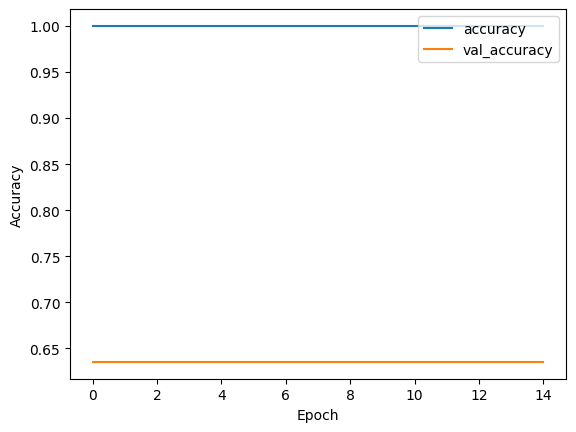

In [57]:
history = model.fit(X_train, y_train, epochs=15, validation_data=(X_test, y_test))

# Plot the accuracy graph
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='upper right')
plt.show()